# Importing Requirements

In [2]:
from IPython.core.display import display, HTML
display (HTML("<style>.container { width:100% !important; }<style>"))


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Setting Directory and Reading File

In [39]:
path = "C:/Users/Piyusha/Desktop/Data Cleaning"
data_dir = os.path.join(path, 'Crowd Sourced Grocery Prices V2.xlsx')
data_output = os.path.join(path, 'Crowd Sourced Grocery Prices.xlsx')

# Exploring the Data Set

In [8]:
df = pd.ExcelFile(data_dir)
df.sheet_names

['Observations', 'Products']

In [9]:
df_observation = pd.read_excel(data_dir, sheet_name='Observations',date_parser=True)

In [10]:
df_observation.head()


Country     City             Obs Date  Product Code Quantity  Price
0     Kenya  Eldoret  2009-01-01 00:00:00          52.0     1 kg  11.92
1  Pakistan   Attock  2009-01-01 00:00:00          44.0     1 kg   9.36
2     India   Nashik  2009-01-01 00:00:00          47.0     1 kg   6.47
3     Kenya  Eldoret  2009-01-01 00:00:00          52.0     1 kg   5.91
4     India   Nashik  2009-01-01 00:00:00          62.0    100 g   1.80

In [11]:
df_products = pd.read_excel(data_dir, sheet_name='Products')

In [12]:
df_products.head()

Product Code           Product Name
0            11       Rice, long grain
1            12            Rice, white
2            13  Cornflakes, Kellogg's
3            14           Flour, wheat
4            15           Flour, maize

# Data Manipulation

In [13]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961797 entries, 0 to 961796
Data columns (total 6 columns):
Country         961732 non-null object
City            961732 non-null object
Obs Date        961732 non-null object
Product Code    961732 non-null float64
Quantity        961732 non-null object
Price           931766 non-null float64
dtypes: float64(2), object(4)
memory usage: 44.0+ MB


In [15]:
df_observation.isnull().sum()

Country            65
City               65
Obs Date           65
Product Code       65
Quantity           65
Price           30031
dtype: int64

In [16]:
df_observation.dropna(axis = 0,subset=['Country', 'City', 'Obs Date', 'Product Code', 'Quantity'],inplace= True)

In [17]:
df_observation.isnull().sum()

Country             0
City                0
Obs Date            0
Product Code        0
Quantity            0
Price           29966
dtype: int64

In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Product Code    30 non-null int64
Product Name    30 non-null object
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


# Imputing the blank cells in the price column 

C:\Users\Piyusha\Downloads\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Piyusha\Downloads\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


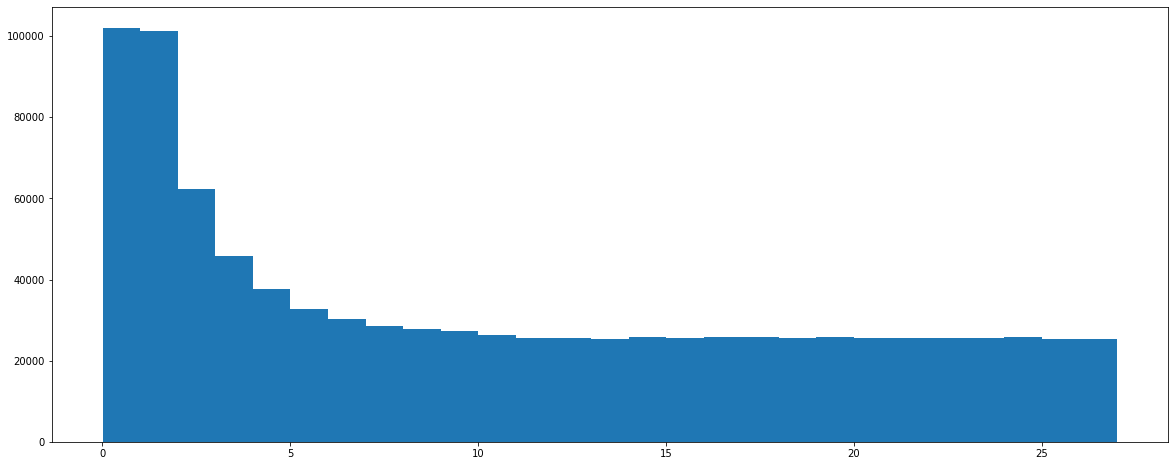

Mean -10.563621484227882
Median -8.91


In [22]:
plt.figure(figsize = (20,8))
plt.hist(df_observation.Price, bins  = 27)
plt.show()
print('Mean -' + str(df_observation.Price.mean()))
print('Median -' + str(df_observation.Price.median()))


In [23]:
df_observation.Price.fillna(df_observation.Price.median(),inplace = True)

In [24]:
df_observation.isna().sum()

Country         0
City            0
Obs Date        0
Product Code    0
Quantity        0
Price           0
dtype: int64

In [25]:
list(df_observation.Country.unique())

['Kenya',
 'Pakistan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil',
 'Brazel',
 'Indonseia',
 'Phillippines']

In [26]:
df_observation.Country = df_observation.Country.map({'Kenya':'Kenya','Pakistan':'Pakistan',
                                                     'India':'India', 'Bangladesh':'Bangladesh',
                                                     'Indonesia':'Indonesia', 'Nigeria':'Nigeria',
                                                     'Philippines':'Philippines','Brazil':'Brazil',
                                                     'Brazel':'Brazil', 'Indonseia':'Indonesia',
                                                      'Phillippines':'Phillippines'})

In [27]:
list(df_observation.Country.unique())

['Kenya',
 'Pakistan',
 'India',
 'Bangladesh',
 'Indonesia',
 'Nigeria',
 'Philippines',
 'Brazil',
 'Phillippines']

In [28]:
df_observation.duplicated().sum()

14397

In [29]:
dfObj = pd.DataFrame(df_observation)

In [30]:
# Select duplicate rows except first occurance based on all columns
duplicateRowsDF = dfObj[dfObj.duplicated()]
print("Duplicate rows except first occurance based on all columns are :")
print(duplicateRowsDF)

Duplicate rows except first occurance based on all columns are :
           Country        City             Obs Date  Product Code Quantity  \
121       Pakistan    Sargodha  2009-01-20 00:00:00          44.0     1 kg   
127       Pakistan  Gujranwala  2009-01-20 00:00:00          44.0     1 kg   
130       Pakistan    Sargodha  2009-01-20 00:00:00          52.0     1 kg   
131       Pakistan  Gujranwala  2009-01-20 00:00:00          52.0     1 kg   
141       Pakistan     Karachi                39834          44.0     1 kg   
...            ...         ...                  ...           ...      ...   
961079     Nigeria       Abuja  2009-03-29 00:00:00          22.0     1 kg   
961146       Kenya     Nairobi  2009-04-22 00:00:00          23.0     1 kg   
961159       Kenya     Nairobi  2009-04-24 00:00:00          24.0     1 kg   
961424  Bangladesh       Dhaka  2009-04-06 00:00:00          24.0     1 kg   
961437  Bangladesh       Dhaka  2009-03-28 00:00:00          24.0     1 kg   

In [31]:
df_observation.drop_duplicates(subset=df_observation.columns,inplace=True)

In [32]:
df_observation.duplicated().sum()

0

# Merging Both data Sets

In [33]:
df_full = pd.merge(df_observation,df_products,how = 'outer')

In [34]:
df_full.head()

Country        City             Obs Date  Product Code Quantity  Price  \
0     Kenya     Eldoret  2009-01-01 00:00:00          52.0     1 kg  11.92   
1     Kenya     Eldoret  2009-01-01 00:00:00          52.0     1 kg   5.91   
2     Kenya     Eldoret  2009-01-02 00:00:00          52.0     1 kg  16.50   
3     Kenya     Eldoret  2009-01-02 00:00:00          52.0     1 kg   9.77   
4  Pakistan  Rawalpindi  2009-01-03 00:00:00          52.0     1 kg  17.80   

   Product Name  
0  Cooking salt  
1  Cooking salt  
2  Cooking salt  
3  Cooking salt  
4  Cooking salt

In [35]:
df_full.sort_values(by = 'Country', inplace = True)

In [36]:
df_full.head()

Country        City             Obs Date  Product Code Quantity  \
237535  Bangladesh       Dhaka  2012-04-16 00:00:00          14.0     1 kg   
256654  Bangladesh  Chittagong  2011-02-27 00:00:00          32.0     6 pc   
692408  Bangladesh  Chittagong  2010-02-16 00:00:00          31.0      1 L   
692405  Bangladesh       Dhaka  2010-02-16 00:00:00          31.0      1 L   
692403  Bangladesh      Khulna  2010-02-16 00:00:00          31.0      1 L   

           Price  Product Name  
237535   0.96193  Flour, wheat  
256654   6.75000          Eggs  
692408  16.76000          Milk  
692405  17.31000          Milk  
692403  17.59000          Milk

In [40]:
df_full.to_excel(data_output,columns=['Country','City','Obs Date','Product Code','Quantity','Price', 'Product Name'])